## Intro to transmission strings

A transit light curve encodes information about the size of a planet relative to the star around which it orbits. This fact enables the inference of the planet radius, $r_{\rm{p}}$, which defines an occulting object with a circular shape.

Here, we extend this measure of a planet's radius from a constant quantity to that of a one-dimensional function, $r_{\rm{p}}(\theta)$, hereafter refered to as a transmission string. This transmission string now encodes the possible variations with radius of a planet as a function of the angle $\theta$ in the plane of the sky. This variation is borne out of change in transmission/opacity of a planet's atmosphere.

We paramterise a transmission string in terms of a Fourier series, such that

$$
r_{\rm{p}}(\theta) = \sum_{n=0}^{N} a_{n} \cos{n \theta} + \sum_{n=1}^{N} b_{n} \sin{n \theta},
$$

where $N$ denotes the finite number of terms with coefficients $a_{n}$ and $b_{n}$. In harmonica a transmission string is constructed from a vector of these Fourier coefficients

$$
\mathbf{r} = \begin{bmatrix}
           a_0\, a_1\, b_1\, a_2\, b_2\, \dots a_N\, b_N  \\
         \end{bmatrix}^T.\\
$$

Note the number of coefficients must be odd, and in the limit of only one term the circular case is recovered. For reference, the first few Fourier terms have the following transmission strings:

<img src="figs/fourier_schematic.png" width="500"/>

In harmonica, a transmission string can be generated using the following code.

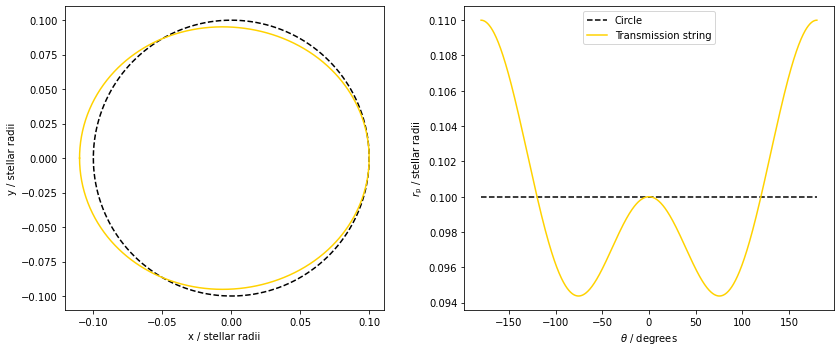

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from harmonica import HarmonicaTransit


r = np.array([0.1, -0.005, 0., 0.005, 0.])
theta = np.linspace(-np.pi, np.pi, 1000)

ht = HarmonicaTransit()
ht.set_planet_transmission_string(r)
transmission_string = ht.get_planet_transmission_string(theta)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_aspect('equal', 'box')
ax1.plot(r[0] * np.cos(theta), r[0] * np.sin(theta), c='#000000', ls='--')
ax1.plot(transmission_string * np.cos(theta), transmission_string * np.sin(theta), c='#ffd200')
ax2.plot(theta * 180. / np.pi, np.ones(theta.shape[0]) * r[0], c='#000000', ls='--', label='Circle')
ax2.plot(theta * 180. / np.pi, transmission_string, c='#ffd200', label='Transmission string')
ax1.set_xlabel('x / stellar radii')
ax1.set_ylabel('y / stellar radii')
ax2.set_xlabel('$\\theta$ / degrees')
ax2.set_ylabel('$r_{\\rm{p}}$ / stellar radii')
ax2.legend()
plt.tight_layout()
plt.show()